Распознавание рукописных цифр

In [58]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras import api
from PIL import Image

In [59]:
(x_train, y_train), (x_test, y_test) = api.datasets.mnist.load_data()

In [60]:
x_train = x_train / 255
x_test = x_test / 255

In [61]:
y_train_cat = api.utils.to_categorical(y_train, 10)
y_test_cat = api.utils.to_categorical(y_test, 10)

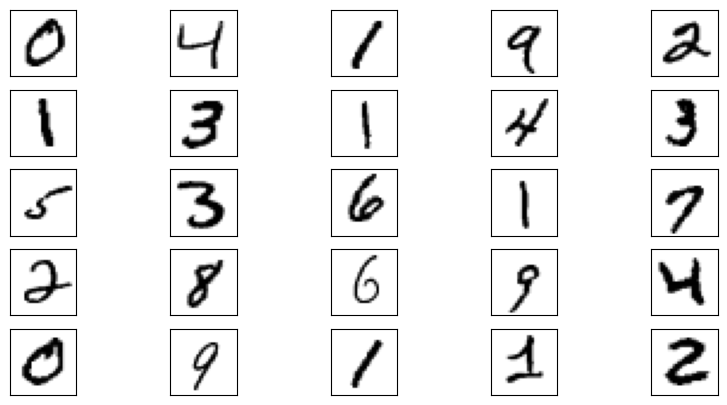

In [62]:
plt.figure(figsize=(10 ,5))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

In [63]:
model = api.Sequential([
    api.layers.Flatten(input_shape=(28, 28, 1)),
    api.layers.Dense(units=128, activation='relu'),
    api.layers.Dense(units=10, activation='softmax')
])
print(model.summary())  # Вывод структуры модели в консоль

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [64]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)  # validation_split разбивает обучающую выборку на обучающую и проверочную в соотношении 80 на 20.

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8650 - loss: 0.4778 - val_accuracy: 0.9509 - val_loss: 0.1640
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9595 - loss: 0.1426 - val_accuracy: 0.9645 - val_loss: 0.1227
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9728 - loss: 0.0908 - val_accuracy: 0.9698 - val_loss: 0.1010
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9799 - loss: 0.0680 - val_accuracy: 0.9685 - val_loss: 0.1041
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9841 - loss: 0.0511 - val_accuracy: 0.9745 - val_loss: 0.0861


In [66]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9754 - loss: 0.0865


[0.07681257277727127, 0.9778000116348267]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[9.9993575e-01 3.7687284e-10 3.1988416e-06 2.1774453e-09 1.4644995e-07
  1.8021969e-07 5.9125188e-05 5.7019560e-07 3.3432306e-09 1.0760418e-06]]
Распознанная цифра: 0


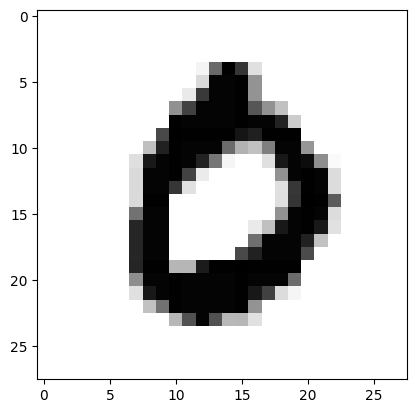

In [69]:
n = 3

x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x) # метод предикт ожидает как минимум два объекта на вход
print(res)
print(f"Распознанная цифра: {np.argmax(res)}")
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [71]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [78]:
mask = pred == y_test

x_false = x_test[~mask]
y_answ = y_test[~mask]
p_false = pred[~mask]
print(len(x_false))

222


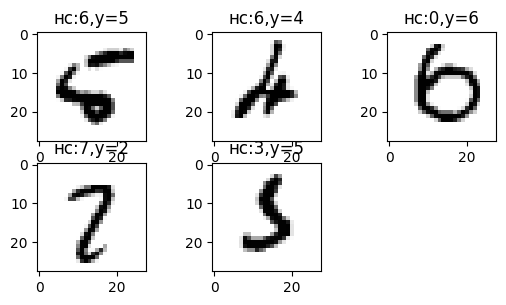

In [79]:
for i in range(5):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.title(f'нс:{p_false[i]},y={y_answ[i]}')
plt.show()